# Avocado Project

# Project Description:-

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags


Some relevant columns in the dataset:

•	Date - The date of the observation  
 
•	AveragePrice - the average price of a single avocado

•	type - conventional or organic

•	year - the year

•	Region - the city or region of the observation

•	Total Volume - Total number of avocados sold

•	4046 - Total number of avocados with PLU 4046 sold

•	4225 - Total number of avocados with PLU 4225 sold

•	4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label:-

To  find the region and find the average price .


In [16]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
import plotly.express as px
# Import Pre-Processing Libs
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [17]:
avocado=pd.read_csv('avocado.csv')
avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [18]:
avocado.sample(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
792,12,2015-10-04,1.05,2814678.93,296032.66,1632488.05,381986.61,504171.61,354840.13,106127.86,43203.62,conventional,2015,GreatLakes
1417,13,2015-09-27,1.06,199908.44,123528.92,17616.44,1515.75,57247.33,53115.57,4131.76,0.00,conventional,2015,NewOrleansMobile
15332,8,2017-11-05,1.64,18268.65,4533.05,324.41,0.00,13411.19,13307.80,103.39,0.00,organic,2017,DallasFtWorth
9752,2,2015-12-13,1.36,24285.79,7419.99,3155.41,3.32,13707.07,444.05,13263.02,0.00,organic,2015,Denver
10418,44,2015-02-22,1.92,1386.85,1140.99,19.20,0.00,226.66,223.33,3.33,0.00,organic,2015,MiamiFtLauderdale
4899,11,2016-10-09,1.49,370422.62,133617.58,190297.13,4510.14,41997.77,41780.40,206.47,10.90,conventional,2016,Sacramento
10666,32,2015-05-17,1.92,68435.46,4444.73,20525.36,119.96,43345.41,43257.15,88.26,0.00,organic,2015,Northeast
4215,3,2016-12-04,1.05,253241.58,143482.91,24486.13,120.00,85152.54,62849.94,19437.60,2865.00,conventional,2016,NewOrleansMobile
16864,3,2017-12-10,1.75,6765.28,1703.63,2659.43,0.00,2402.22,2395.55,6.67,0.00,organic,2017,Sacramento
6334,29,2017-06-11,1.28,315240.72,71644.61,61426.82,17894.09,164275.20,159993.56,2790.35,1491.29,conventional,2017,Detroit


### data preprocessing 

In [19]:
avocado.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [20]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


This dataset has (9)float64 data,(2)int64 data and (3)object.  

Here one unwanted column is present that is Unnamed .  

The Date column is object

In [21]:
avocado.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There is no any NULL value in this dataset

In [23]:
avocado.duplicated().sum()

0

In [25]:
# Datetime Settings
avocado['Date'] =pd.to_datetime(avocado.Date)
avocado.sort_values(by=['Date'], inplace=True, ascending=True)

# Reset Index
avocado = avocado.reset_index()

# Remove Unnamed: 0 Column as well as index column
avocado = avocado.drop(columns=["Unnamed: 0", "index"])

# Change 4046, 4225, 4770 to their respective values
avocado = avocado.rename(columns={"4046":"Small Hass", "4225":"Large Hass", "4770":"XLarge Hass"})


# EDA

In [26]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   Small Hass    18249 non-null  float64       
 4   Large Hass    18249 non-null  float64       
 5   XLarge Hass   18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [28]:
avocado.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,18249,2016-08-13 23:30:43.498273792,2015-01-04 00:00:00,2015-10-25 00:00:00,2016-08-14 00:00:00,2017-06-04 00:00:00,2018-03-25 00:00:00,NaN
AveragePrice,18249.0,1.405978,0.44,1.1,1.37,1.66,3.25,0.402677
Total Volume,18249.0,850644.013009,84.56,10838.58,107376.76,432962.29,62505646.52,3453545.355399
Small Hass,18249.0,293008.424531,0.0,854.07,8645.3,111020.2,22743616.17,1264989.081763
Large Hass,18249.0,295154.568356,0.0,3008.78,29061.02,150206.86,20470572.61,1204120.401135
XLarge Hass,18249.0,22839.735993,0.0,0.0,184.99,6243.42,2546439.11,107464.068435
Total Bags,18249.0,239639.20206,0.0,5088.64,39743.83,110783.37,19373134.37,986242.399216
Small Bags,18249.0,182194.686696,0.0,2849.42,26362.82,83337.67,13384586.8,746178.514962
Large Bags,18249.0,54338.088145,0.0,127.47,2647.71,22029.25,5719096.61,243965.964547
XLarge Bags,18249.0,3106.426507,0.0,0.0,0.0,132.5,551693.65,17692.894652


(array([5.000e+00, 2.400e+01, 5.200e+01, 8.100e+01, 1.690e+02, 2.570e+02,
        3.870e+02, 3.810e+02, 6.490e+02, 9.580e+02, 8.500e+02, 1.029e+03,
        1.074e+03, 8.600e+02, 1.011e+03, 7.240e+02, 9.760e+02, 1.005e+03,
        8.450e+02, 9.560e+02, 8.890e+02, 6.620e+02, 6.780e+02, 5.080e+02,
        6.750e+02, 5.330e+02, 3.550e+02, 3.300e+02, 2.320e+02, 2.220e+02,
        1.850e+02, 1.080e+02, 1.080e+02, 1.210e+02, 7.600e+01, 4.800e+01,
        2.900e+01, 3.900e+01, 3.700e+01, 2.400e+01, 2.300e+01, 1.800e+01,
        2.000e+01, 1.500e+01, 1.000e+01, 5.000e+00, 3.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00]),
 array([0.44  , 0.4962, 0.5524, 0.6086, 0.6648, 0.721 , 0.7772, 0.8334,
        0.8896, 0.9458, 1.002 , 1.0582, 1.1144, 1.1706, 1.2268, 1.283 ,
        1.3392, 1.3954, 1.4516, 1.5078, 1.564 , 1.6202, 1.6764, 1.7326,
        1.7888, 1.845 , 1.9012, 1.9574, 2.0136, 2.0698, 2.126 , 2.1822,
        2.2384, 2.2946, 2.3508, 2.407 , 2.4632, 2.5194, 2.5756, 2.6318,
        2.688 , 

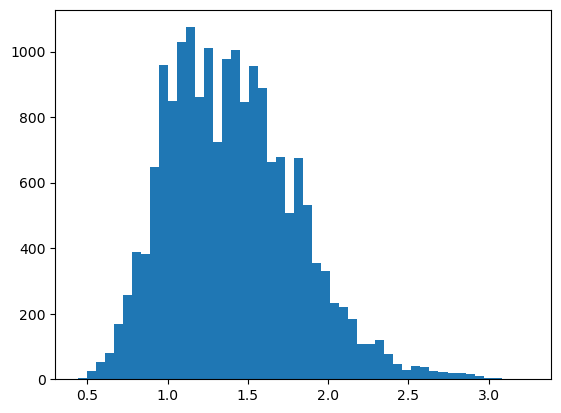

In [33]:
plt.hist(avocado["AveragePrice"],bins=50)

<Axes: xlabel='AveragePrice'>

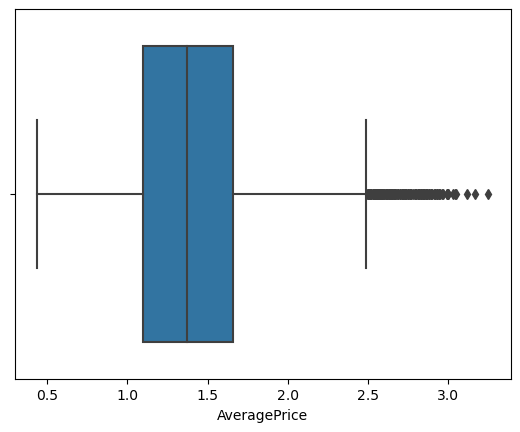

In [34]:
sns.boxplot(x=avocado["AveragePrice"])

There seems to be some outliers.

(array([1.6247e+04, 5.6900e+02, 5.2900e+02, 2.7400e+02, 2.6000e+02,
        1.6300e+02, 2.8000e+01, 4.0000e+00, 5.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 3.0000e+00, 7.0000e+00,
        5.0000e+00, 4.0000e+00, 8.0000e+00, 1.8000e+01, 1.2000e+01,
        1.8000e+01, 1.6000e+01, 1.1000e+01, 1.0000e+01, 2.1000e+01,
        9.0000e+00, 6.0000e+00, 7.0000e+00, 3.0000e+00, 4.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([8.45600000e+01, 1.25019580e+06, 2.50030704e+06, 3.75041828e+06,
        5.00052952e+06, 6.25064076e+06, 7.50075200e+06, 8.75086323e+06,
        1.00009745e+07, 1.12510857e+07, 1.25011970e+07, 1.37513082e+07,
        1.50014194e+07, 1.62515307e+07, 1.75016419e+07, 1.87517531e+07,
        2.00018644e+07, 2.1251

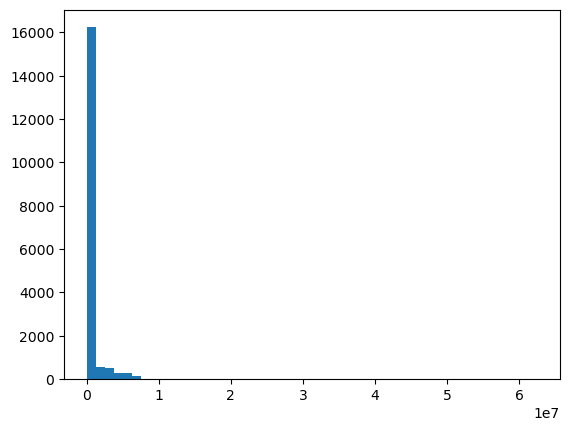

In [37]:
plt.hist(x = avocado["Total Volume"],bins=50)


<Axes: xlabel='Total Volume'>

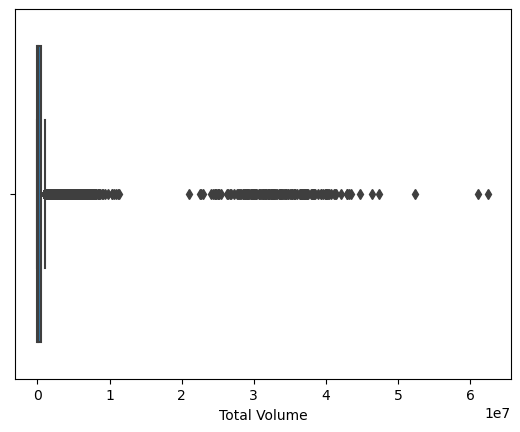

In [38]:
sns.boxplot(x=avocado["Total Volume"])

As we can see there are a LOT of outliers, especially in the volume column. So dealing with outliers was and will be the main reason of this project.

In [40]:
# Checking the prices of conventional avocados

conventional_avocados = avocado["type"]== "conventional"
organic_avocados = avocado["type"]== "organic"

# fig, ax = plt.subplots(2, 1, figsize=(10, 8), dpi=120)
fig = plt.figure(figsize = (26, 7))


# Data - CONVENTIONAL
dates_conventional = avocado[conventional_avocados]["Date"].tolist()
average_prices_conventional = avocado[conventional_avocados]["AveragePrice"].tolist()
total_volume_conventional = avocado[conventional_avocados]["Total Volume"]


# Data - ORGANIC
dates_organic = avocado[organic_avocados]["Date"].tolist()
average_prices_organic = avocado[organic_avocados]["AveragePrice"].tolist()
total_volume_organic = avocado[organic_avocados]["Total Volume"]



<Figure size 2600x700 with 0 Axes>

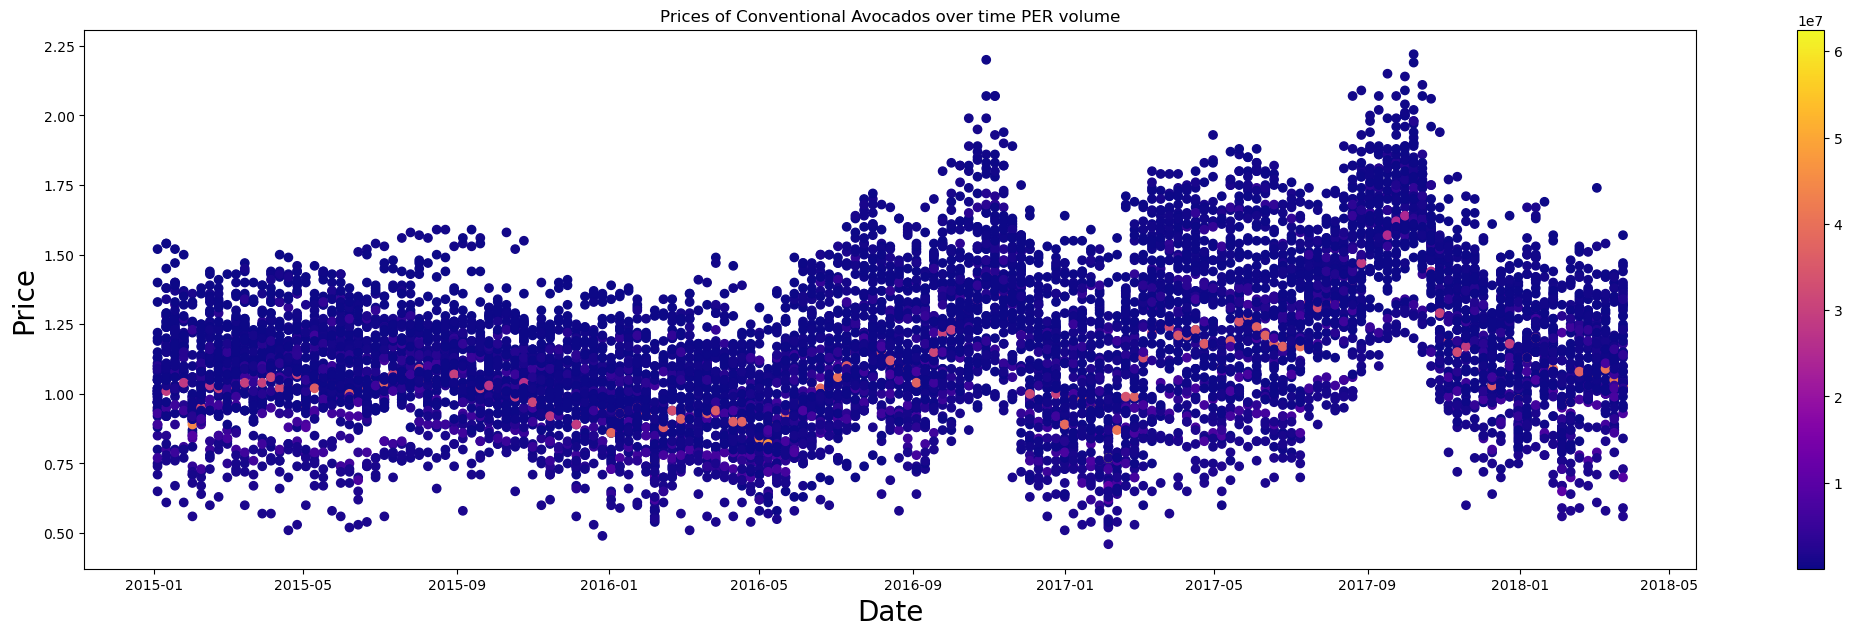

In [42]:
fig = plt.figure(figsize = (26, 7))
plt.scatter(dates_conventional, average_prices_conventional, c=total_volume_conventional, cmap="plasma")
plt.colorbar()
plt.xlabel("Date", fontsize=20)
plt.ylabel("Price", fontsize=20)
plt.title("Prices of Conventional Avocados over time PER volume")
plt.show()

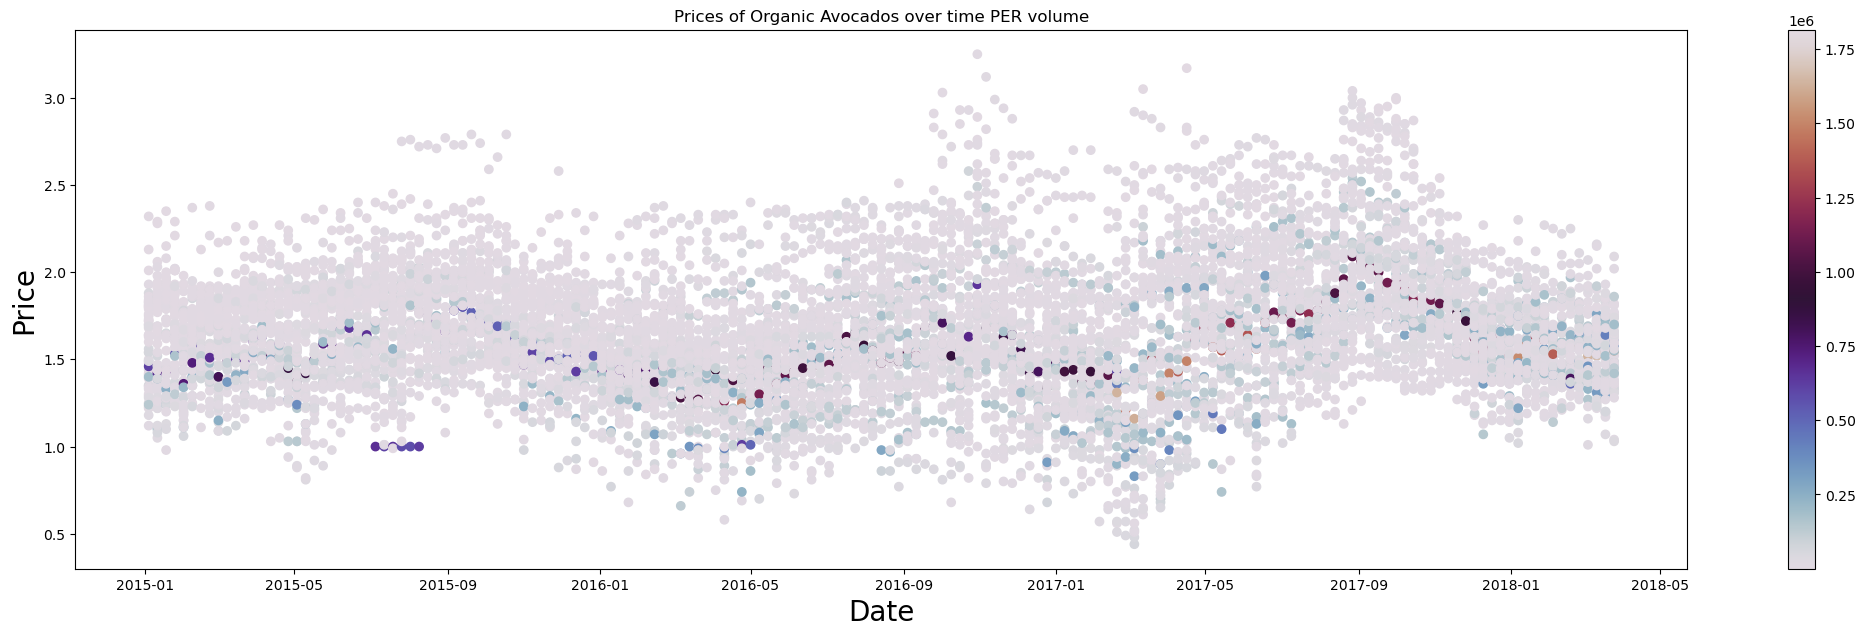

In [43]:
fig = plt.figure(figsize = (26, 7))
plt.scatter(dates_organic, average_prices_organic, c=total_volume_organic, cmap="twilight")
plt.colorbar()
plt.xlabel("Date", fontsize=20)
plt.ylabel("Price", fontsize=20)
plt.title("Prices of Organic Avocados over time PER volume")
plt.show()

In [44]:
avocado.region.value_counts()

region
Southeast              338
NewOrleansMobile       338
SanDiego               338
BaltimoreWashington    338
Roanoke                338
RichmondNorfolk        338
Northeast              338
SouthCentral           338
GreatLakes             338
Louisville             338
Seattle                338
CincinnatiDayton       338
NewYork                338
Indianapolis           338
Chicago                338
Jacksonville           338
Columbus               338
Detroit                338
Philadelphia           338
PhoenixTucson          338
Nashville              338
Portland               338
HartfordSpringfield    338
Tampa                  338
Orlando                338
West                   338
Denver                 338
GrandRapids            338
NorthernNewEngland     338
BuffaloRochester       338
HarrisburgScranton     338
Pittsburgh             338
Boise                  338
LosAngeles             338
LasVegas               338
Atlanta                338
DallasFtWorth        

In [45]:
avocado.region.unique() 

array(['Southeast', 'Chicago', 'HarrisburgScranton', 'Pittsburgh',
       'Boise', 'WestTexNewMexico', 'LosAngeles', 'LasVegas', 'Atlanta',
       'DallasFtWorth', 'MiamiFtLauderdale', 'Plains', 'StLouis',
       'Syracuse', 'Midsouth', 'Sacramento', 'Boston', 'Charlotte',
       'Spokane', 'Albany', 'Houston', 'SouthCarolina', 'SanFrancisco',
       'TotalUS', 'RaleighGreensboro', 'BuffaloRochester',
       'NorthernNewEngland', 'GrandRapids', 'Denver', 'SanDiego',
       'BaltimoreWashington', 'Roanoke', 'RichmondNorfolk', 'Northeast',
       'SouthCentral', 'GreatLakes', 'Louisville', 'Seattle',
       'CincinnatiDayton', 'NewYork', 'NewOrleansMobile', 'Indianapolis',
       'Jacksonville', 'Columbus', 'Detroit', 'Philadelphia',
       'PhoenixTucson', 'Nashville', 'Portland', 'HartfordSpringfield',
       'Tampa', 'Orlando', 'West', 'California'], dtype=object)

In [46]:
# Basically we can remove states and work on cities rather than analysing both 

regions_to_remove = ['California', 'GreatLakes', 'Midsouth', 'NewYork', 'Northeast', 'SouthCarolina', 'Plains', 'SouthCentral', 'Southeast', 'TotalUS', 'West']
avocado = avocado[~avocado.region.isin(regions_to_remove)]
len(avocado.region.unique())

43

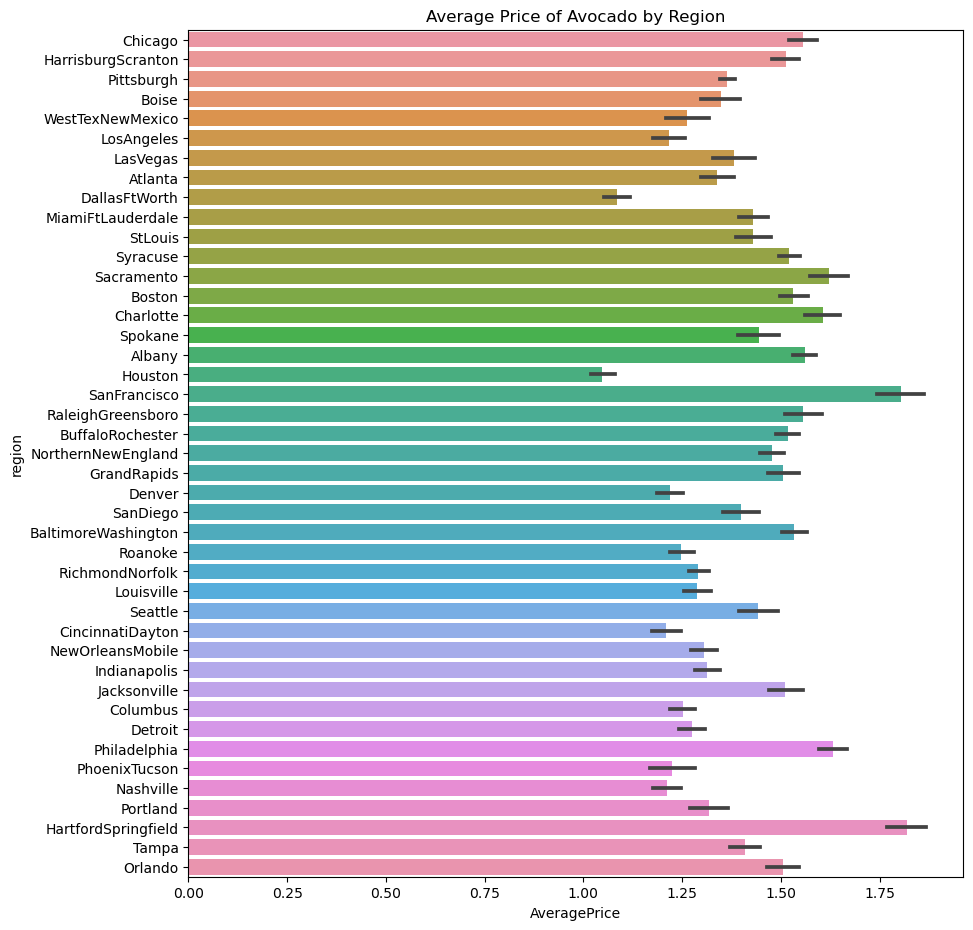

In [47]:
# The average prices by regions
plt.figure(figsize=(10,11))
plt.title("Average Price of Avocado by Region")
sns.barplot(y="region",x="AveragePrice", data=avocado)
plt.show()

In [48]:
#OneHotEncoding pd.get_dummies
avocado.drop(columns="Date", inplace=True)
avocado = pd.get_dummies(avocado, drop_first=True)
avocado.shape

(14531, 53)

In [52]:
# Scaling via RobustScaler
robust_scaler = RobustScaler()
robust_scaler.fit(avocado)
robust_scaler.transform(avocado)

array([[ 0.21428571, -0.1507436 , -0.04103075, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.55357143, -0.20088159, -0.05461081, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.26785714, -0.02483219, -0.01693176, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.08928571,  1.24050213,  3.35544959, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.66071429, -0.0806822 , -0.05638722, ...,  0.        ,
         0.        ,  0.        ],
       [-0.01785714,  2.86055186,  1.82869906, ...,  0.        ,
         0.        ,  0.        ]])

In [54]:
# Applying PCA
pca = PCA(n_components=2)
pca.fit(avocado)

# Some PCA stats
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.90395013 0.04866989]
[60396065.58409766 14014145.24368099]


In [62]:
def cap_data(df):
    for col in df.columns:
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
         
    return df

df_avocados = cap_data(avocado)           

<Axes: xlabel='Total Volume'>

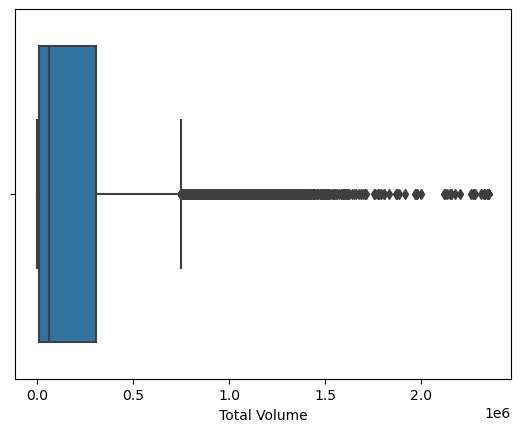

In [63]:
sns.boxplot(x=avocado["Total Volume"])

# Modelling

In [64]:
# Set the features and targets
features = avocado.drop(columns="AveragePrice")
target = avocado.AveragePrice

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [65]:
# Feature Importance
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)
round(model_dt.score(X_test, y_test), 2) * 100

73.0

In [66]:
y_test.shape

(2907,)

In [69]:
X_test.shape

(2907, 52)

In [71]:
   # Traing the other 3 models
modelclasses = [["Linear Regression", LinearRegression()],["Decision Tree Regressor", DecisionTreeRegressor()],["Random Forest Regressor", RandomForestRegressor()]]

insights = []
for modelname, Model in modelclasses:
    model = Model
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)        
    insights.append((modelname, score))

In [72]:
pd.DataFrame(insights, columns=["Model Name", "Score"])

,Model Name,Score
0,Linear Regression,0.549135
1,Decision Tree Regressor,0.734547
2,Random Forest Regressor,0.861045
